# Analysis of the biggest ground truth communities on the com-Amazon network

## Written by:
* Group 9
* Nuno Correia, 58638
* Miguel Miranda, 58246

## Introduction

Our project focuses on utilizing network chracterization methods to analyze the 2 thousand biggest communities found on the com-Amazon network. <br/>

Throughout this project we will use the given ground truth in the SNAP, which is:
* Nodes represent products;
* Edges represent frequent co-purchsing;
* Communities represent product categories;

Our goal is to try to describe how these products group themselves and see if we can uncover patterns or extract information from the network about how these frequent co-purchases occur.

## Library imports

The following libraries were imported so we could conduct our study of the network:
* NumPy
* Networkx
* Matplotlib
* Counter from collections
* Pandas

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statistics
from collections import Counter
import pandas as pd

## Import of the network

We first import the entire network, and after that we obtain the top 5000 communities ordered in descending order by size.

In [2]:
edge_list_amazon = open("com-amazon.ungraph.txt", "rb")
COMPLETE_AMAZON = nx.read_edgelist(edge_list_amazon, comments="#", nodetype=int) 
edge_list_amazon.close() 

# Top 5000 communities obtained from SNAP.
communities_by_size = dict()
size_of_communities = list()
communities_of_nodes = dict()

with open("com-amazon.top5000.cmty.txt", "r") as file:
    for line in file:

        # Split each line into node IDs and convert them to integers
        nodes = list(map(int, line.strip().split()))

        for node in nodes:
            communities_of_nodes[node] = nodes

        size_of_communities.append(len(nodes))
        if len(nodes) not in communities_by_size:
            communities_by_size[len(nodes)] = list()

        communities_by_size[len(nodes)].append(nodes)
        
# Ordering of the top 5000 communities.
sorted_communities_by_size = dict(sorted(communities_by_size.items(), reverse=True))
sorted_size_of_communities= list(sorted(size_of_communities, reverse=True))

## Partitioning the network

For our partition we selected to import the top 2 thousand communities in terms of size from the top 5 thousand communities found on SNAP. <br/>
We chose this partition since we would like to study how the biggest communities of products are formed and what information we could extract from them. <br/>
Our entire project is based on the hypothesis that every community is a subgraph of the original network, as such we will analyze all of the communities below as graphs, and compare the results between them.

In [3]:
# NC - Number of Communities to consider.
NC = 2000

# cc - Comunities count
cc = 0
#edges = set()
nodes = set()
two_thousand_commuinities = list()

# We want only the nodes that make up the top 2 thousand communities.
for key in sorted_communities_by_size:

    # If we haven't reach the desired number of communities, we continue.
    if cc != NC:

        # For every community we will register all of its nodes.
        for community in sorted_communities_by_size[key]:
            if cc != NC:
                for node in community:
                    nodes.add(node)
                two_thousand_commuinities.append(community)
                cc += 1
            else:
                # If the desired number of coumminities is achieved we stop.
                break 
    else:
        # If the desired number of coumminities is achieved we stop.
        break

PARTITION_2K = COMPLETE_AMAZON.subgraph(list(nodes))

### Edge list of the partition
Below we present code to export the subgraph that contains the top 2 thousand communities into a .graphml file. In case the professor would like to examine them.

In [4]:
nx.write_graphml_lxml(PARTITION_2K, "top_2000_communities.graphml")

### Graphical Representation of the Partition

<img src="network.png">

### Network community sizes comparison

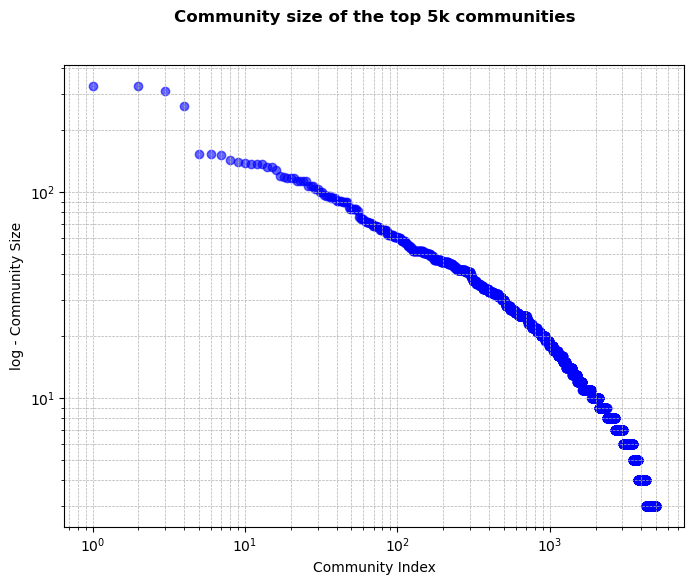

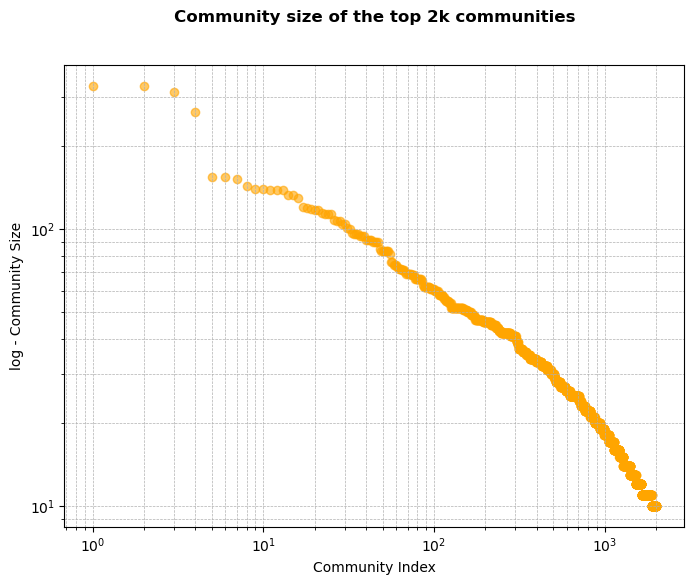

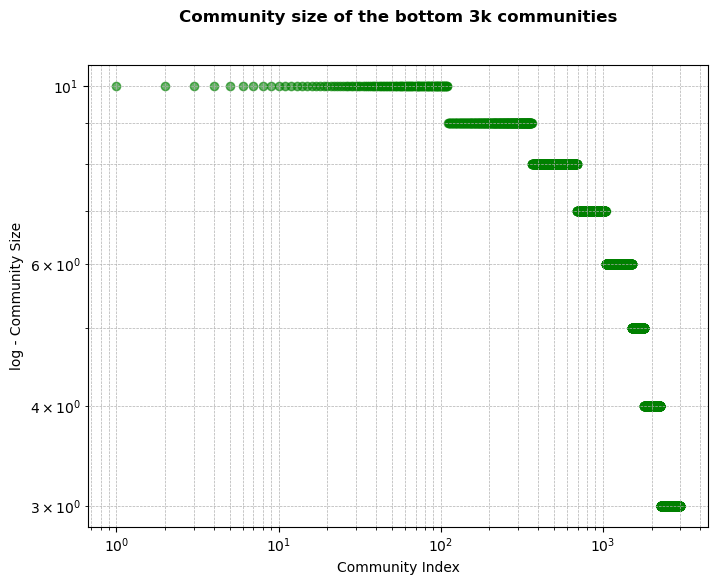

In [5]:
community_indices = range(1, len(sorted_size_of_communities) + 1)
community_sizes = sorted_size_of_communities

plt.figure(figsize=(8, 6))
plt.scatter(community_indices, community_sizes, alpha=0.6, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Community Index')
plt.ylabel('log - Community Size')
plt.title('Community size of the top 5k communities\n\n', fontweight="bold")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("size_top_5k.png", bbox_inches='tight')
plt.show()

top_2k_indices = range(1, len(sorted_size_of_communities[:2000]) + 1)
top_2k_sizes = sorted_size_of_communities[:2000]

plt.figure(figsize=(8, 6))
plt.scatter(top_2k_indices, top_2k_sizes, alpha=0.6, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Community Index')
plt.ylabel('log - Community Size')
plt.title('Community size of the top 2k communities\n\n', fontweight="bold")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("size_top_2k.png", bbox_inches='tight')
plt.show()

bottom_3k_indices = range(1, len(sorted_size_of_communities[2000:]) + 1)
bottom_3k_sizes = sorted_size_of_communities[2000:]

plt.figure(figsize=(8, 6))
plt.scatter(bottom_3k_indices, bottom_3k_sizes, alpha=0.6, color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Community Index')
plt.ylabel('log - Community Size')
plt.title('Community size of the bottom 3k communities\n\n', fontweight="bold")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("size_bottom_3k.png", bbox_inches='tight')
plt.show()

The distribution of community sizes doesn't change if we remove 3 thousand comunities


## Analysis of the real world network properties of the partition

To begin our analysis, we want to check whether our partition's various communities behave like typical real world networks. <br/>
To do this we will examine the following statistics:
* Degree distribution
* Average clustering coefficient (CC) 
* Average Path Length (APL)
* Density and sparsity 

### Degree distribution

We want to check how the degree distribution looks like for these communities and compare this distribution to the typical real world network distribution.

Most frequent degree: 5
Highes frequency: 3182


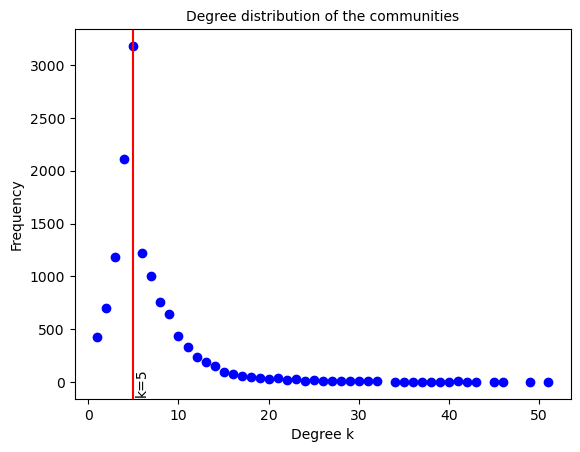

In [ ]:
degree_list = [PARTITION_2K.degree(n) for n in PARTITION_2K.nodes]

counter_degree = Counter(degree_list)    
degrees, freq = zip(*counter_degree.items())

print("Most frequent degree:", max(counter_degree, key=counter_degree.get))
print("Highest frequency:", counter_degree[5])

plt.scatter(degrees, freq, color='blue')
plt.title("Degree distribution of the communities", fontsize=10)
plt.xlabel('Degree k', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(5, color='r')
plt.text(5.1, 0.5, 'k=5', rotation=90, va='center')

plt.savefig("com_degree_dist.png", bbox_inches='tight')
plt.show()

Interpretation: The graph obtain is very similar to what was to be expected from a real world network, a very fast increase around up until a certain point and then a very rapid decay when we get to bigger degrees. <br/>

Interpretation using the ground truth: This tell us that products don't have a very big set of products that they tend to be frequently co-purchased with. So products getting frequently co-purchased together seems to be very specific to each product and not that general. 

### Average degree per network

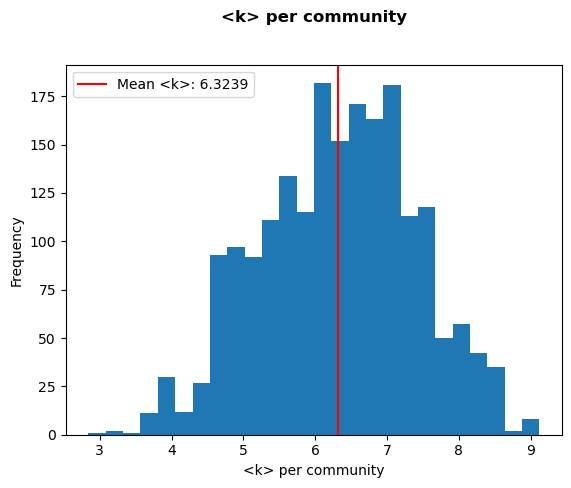

In [7]:
avg_degree_values = list()
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    avg_degree_values.append( np.mean( [community_as_graph.degree(n) for n in community_as_graph.nodes] ) )

plt.hist(avg_degree_values, bins='auto', log=False)
plt.xlabel('<k> per community')
plt.ylabel('Frequency')

plt.title('<k> per community\n\n',
          fontweight = "bold")
plt.axvline(np.mean(avg_degree_values), color='r', label=f'Mean <k>: {np.mean(avg_degree_values):.4f}')
plt.legend()
plt.savefig("com_avg_degree_dist.png", bbox_inches='tight')
plt.show()

### Average clustering coefficient

In [8]:
cc_values = list()
cc_in_com = list()
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    cc_per_node = nx.clustering(community_as_graph)
    for node in cc_per_node:
        cc_in_com.append( cc_per_node[node] )
    cc_values.append( np.mean(cc_in_com) )
    cc_in_com = list()

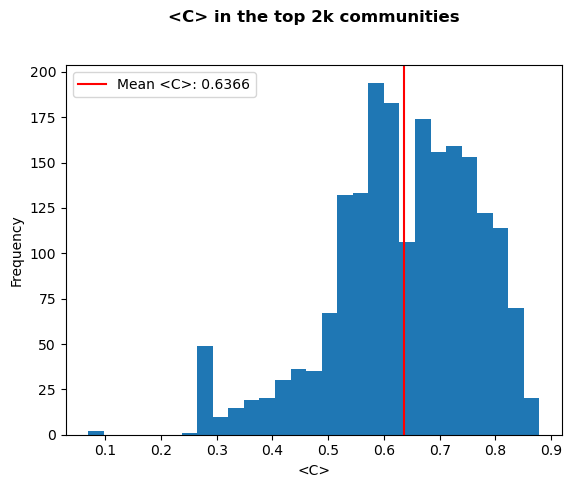

In [9]:
plt.hist(cc_values, bins='auto', log=False)
plt.xlabel('<C>')
plt.ylabel('Frequency')

plt.axvline(np.mean(cc_values), color='r', label=f'Mean <C>: {np.mean(cc_values):.4f}')
plt.legend()
plt.title('<C> in the top 2k communities\n\n',
          fontweight = "bold")
plt.savefig("average_cluster_coeff.png", bbox_inches='tight')
plt.show()

Interpretation: There is a clear pattern before the mean of the average clustering coefficient, the average clustering coefficient per community grows somewhat irregularly until it reaches at around the mean, indicated by the red line which is $<C> = 0.6366$. After the mean it dips heavily at around $<C> = 0.6$, increases and then decays quite fast between $<C> = 0.7$ and $<C> = 0.9$.

Interpretation using the ground truth: A product has a probability of 0.6366 of being co-purchased with two other products that are also co-purchased, this is because $<C> = 0.6366 $. This tells us that co-purchased products tend to also have co-purchased products associated with them.

### Average path length

In [10]:
apl_per_community = dict()
apl_values = list()
num_c = 1
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    com_apl_value = nx.average_shortest_path_length(community_as_graph)
    apl_per_community[num_c] = com_apl_value
    apl_values.append(com_apl_value)
    num_c += 1

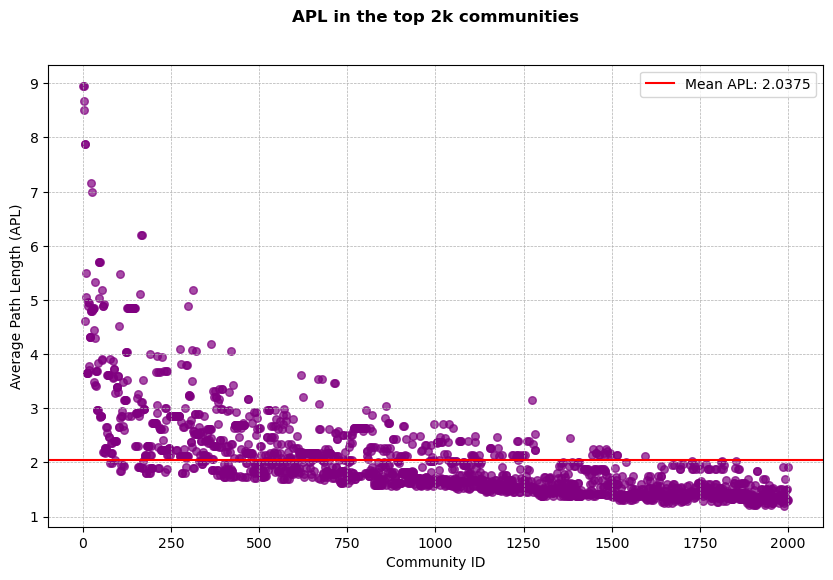

In [11]:
apl_numbers = list()
for community in apl_per_community:
    apl_numbers.append(apl_per_community[community])
    
plt.figure(figsize=(10, 6))
plt.scatter(top_2k_indices, apl_numbers, alpha=0.7, color='purple', s=30)
plt.xlabel('Community ID')
plt.ylabel('Average Path Length (APL)')
plt.title('APL in the top 2k communities\n\n', fontweight="bold")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.axhline(np.mean(apl_values), color='r', label=f'Mean APL: {np.mean(apl_values):.4f}')
plt.legend()
plt.savefig("scatter_community_apl.png", bbox_inches='tight')
plt.show()

Interpretation: The APL values of a large portion of the communities are below the average APL per community.

Interpretation using the ground truth: Most co-purchased products tend have a degree of separation of 2, since we have an APL value of approximately 2, reflecting the small world effect.

### Density and sparsity

Density of the original network: 1.6513834036534368e-05
Density of our partition network: 0.0004798313065530309


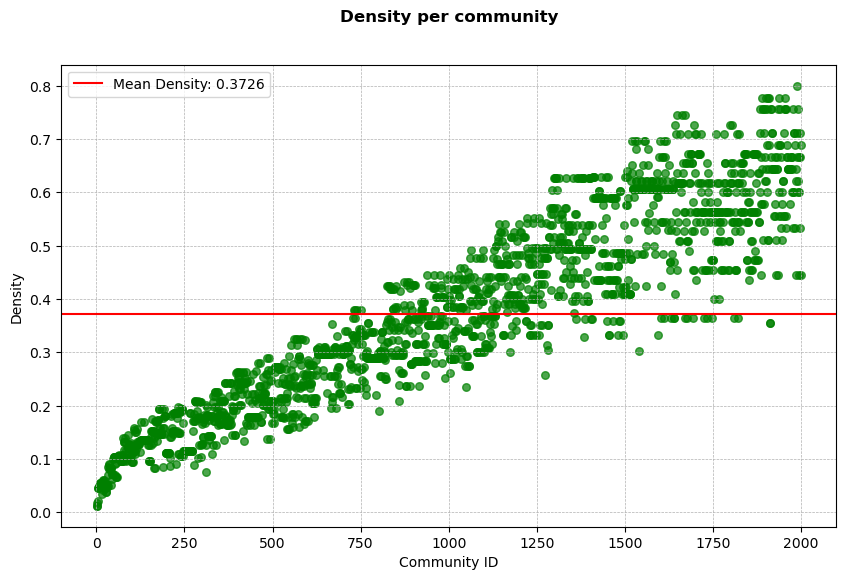

In [12]:
print("Density of the original network:", nx.density(COMPLETE_AMAZON))
print("Density of our partition network:", nx.density(PARTITION_2K))

density_values = list()
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    density_values.append( nx.density(community_as_graph) )

plt.figure(figsize=(10, 6))
plt.scatter(top_2k_indices, density_values, alpha=0.7, color='green', s=30)
plt.xlabel('Community ID')
plt.ylabel('Density')
plt.title('Density per community\n\n', fontweight="bold")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.axhline(np.mean(density_values), color='r', label=f'Mean Density: {np.mean(density_values):.4f}')
plt.legend()
plt.savefig("scatter_community_density.png", bbox_inches='tight')
plt.show()

Interpretation: We can see that most communities are very sparse since the average density is around 0.3726 and for a network to be sparse its density has to be lower than 1. This supports the idea that these connections are very deliberate.

Interpretation using the ground truth: Even in categories, products tend to only have select connections and they don't connect with many others.

### Conclusion from the analysis of the real world network properties

From the analysis of these measures we can conclude that:
* The average product is frequently co-purchased with 5 other products, this is because $<k> = 5$;
* A product has a probability of 0.6366 of being co-purchased with two other products that are also co-purchased, this is because $<C> = 0.6366$;
* Most products in a category are not co-purchased together, they’re only co-purchased with a select number of products. This is because community density is on average $<d> = 0.3726$;
* Most co-purchased products have a degree of separation of 2, since we have $APL = 2$, the “distance” between products tends to be 2;

## Analysis using other measures

We want to further analyze other properties of the network, so to do this we will calculate the following statistics:
* Diameter
* Closeness
* Betweenness
* Assortativity
* Weak ties 

### Diameter

In [13]:
dia_per_community = dict()
dia_values = list()
num_c = 1
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    com_dia_value = nx.diameter(community_as_graph)
    dia_per_community[num_c] = com_dia_value
    dia_values.append(com_dia_value)
    num_c += 1

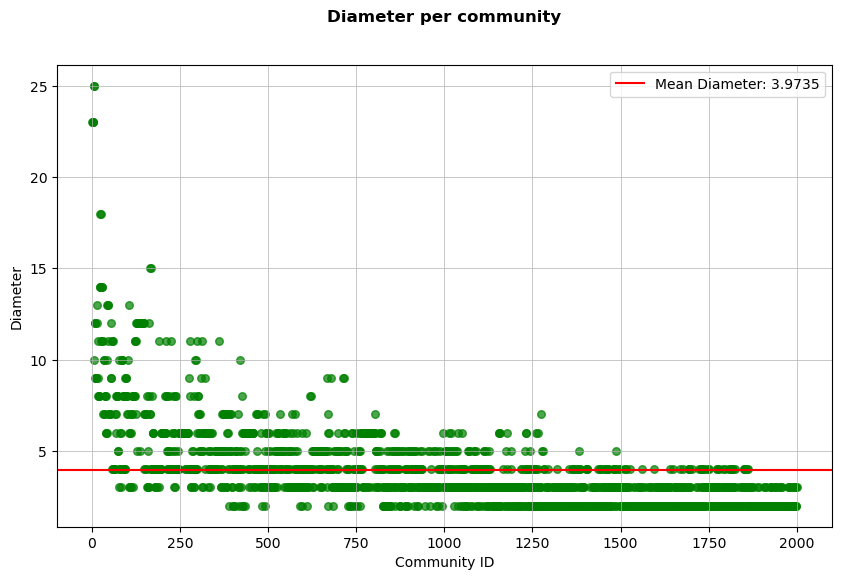

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(top_2k_indices, dia_values, alpha=0.7, color='green', s=30)
plt.xlabel('Community ID')
plt.ylabel('Diameter')
plt.title('Diameter per community\n\n', fontweight="bold")
plt.grid(True, which="both", linewidth=0.5)
plt.axhline(np.mean(dia_values), color='r', label=f'Mean Diameter: {np.mean(dia_values):.4f}')
plt.legend()
plt.savefig("scatter_community_diameter.png", bbox_inches='tight')
plt.show()

Interpretation: The average diameter of the communities is d = 3.9735. Therefore, we can conclude that the longest paths are not that longer compared to the average APL of the communities, which is 2.0375. 

Interpretation using the ground truth: Products tend to have an average degree of separation of approximately 4, we can conclude that on average the path between the least related products is 4 steps.

### Closeness

In [15]:
closeness_per_community = dict()
num_c = 1
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    com_clos_value = nx.centrality.closeness_centrality(community_as_graph)
    closeness_per_community[num_c] = com_clos_value
    num_c += 1

clo_values = list()
clo_per_com = list()
for com in closeness_per_community:
    for node in closeness_per_community[com]:
        clo_per_com.append(closeness_per_community[com][node])
    clo_values.append(np.mean(clo_per_com))  
    clo_per_com = list()

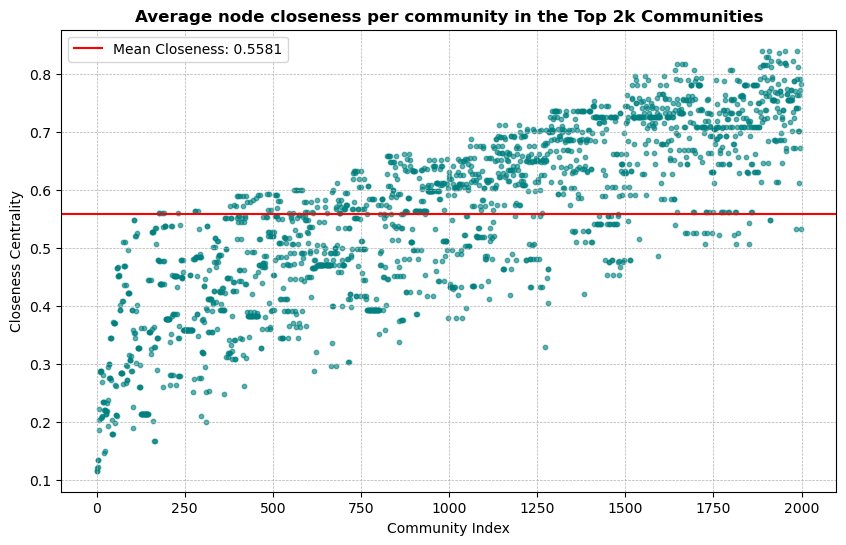

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(top_2k_indices)), clo_values, alpha=0.6, color='teal', s=10)
plt.xlabel('Community Index')
plt.ylabel('Closeness Centrality')
plt.title('Average node closeness per community in the Top 2k Communities', fontweight="bold")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.axhline(np.mean(clo_values), color='r', label=f'Mean Closeness: {np.mean(clo_values):.4f}')
plt.legend()
plt.savefig("scatter_community_closeness_2k.png", bbox_inches='tight')
plt.show()

Interpretation: We can see that the average community closseness is 0.5581, with the peak in frequency around that value, suggesting that the communities have a balanced structure, with common central nodes.

Interpretation using the ground truth: On average, the centrality of each product in its category is balanced, not being to sparse, neither too much connected.

### Betweenness

In [17]:
betweenness_per_community = dict()
num_c = 1
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    betweenness_per_community[num_c] = nx.centrality.betweenness_centrality(community_as_graph)
    num_c += 1
betweenness_per_community

betw_values = list()
betw_per_com = list()
for com in betweenness_per_community:
    for node in betweenness_per_community[com]:
        betw_per_com.append(betweenness_per_community[com][node])
    betw_values.append(np.mean(betw_per_com))  
    betw_per_com = list()

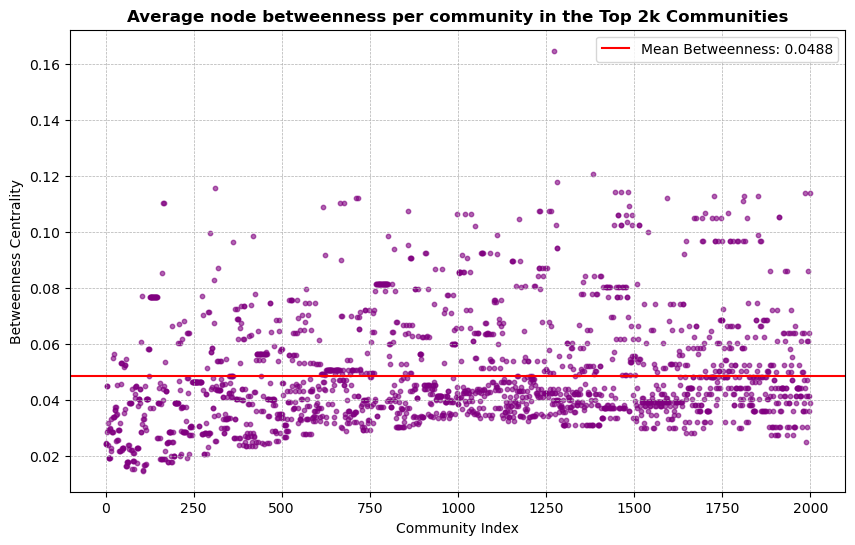

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(top_2k_indices)), betw_values, alpha=0.6, color='purple', s=10)
plt.xlabel('Community Index')
plt.ylabel('Betweenness Centrality')
plt.title('Average node betweenness per community in the Top 2k Communities', fontweight="bold")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.axhline(np.mean(betw_values), color='r', label=f'Mean Betweenness: {np.mean(betw_values):.4f}')
plt.legend()
plt.savefig("scatter_community_betweenness_2k.png", bbox_inches='tight')
plt.show()

Interpretation: The mean betweenness of the communities is very low – 0.0488, the majority of nodes having low influence on the network.

Interpretation using the ground truth: Most products don't have a high influence in the its category.

### Assortativity

In [19]:
entire_network_ass = nx.assortativity.degree_assortativity_coefficient(PARTITION_2K)
print("Assortativity for the entire network: {0}".format(entire_network_ass))

ass_per_community = dict()
ass_values = list()
num_c = 1
for community in two_thousand_commuinities:
    community_as_graph = PARTITION_2K.subgraph(community)
    com_ass_value = nx.assortativity.degree_assortativity_coefficient(community_as_graph)
    ass_per_community[num_c] = com_ass_value
    ass_values.append(com_ass_value)
    num_c += 1

Assortativity for the entire network: -0.1017666871774564


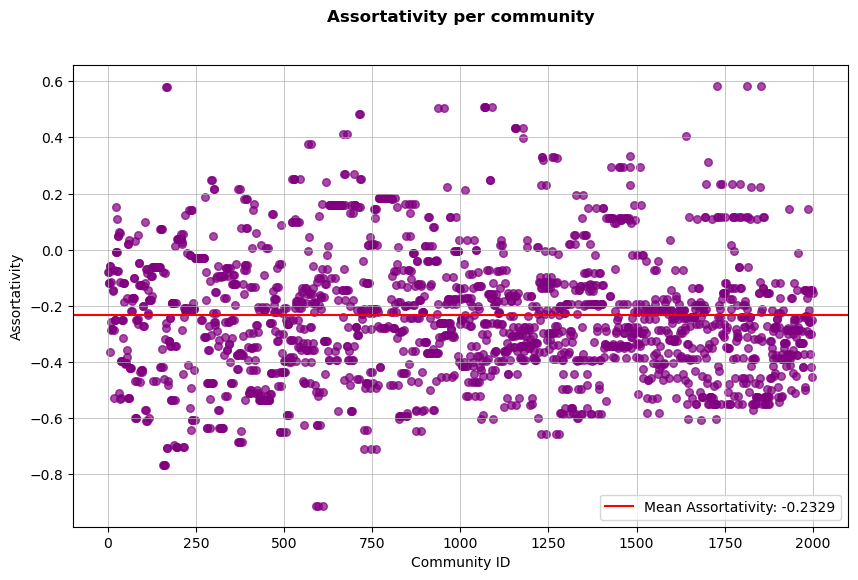

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(top_2k_indices, ass_values, alpha=0.7, color='purple', s=30)
plt.xlabel('Community ID')
plt.ylabel('Assortativity')
plt.title('Assortativity per community\n\n', fontweight="bold")
plt.grid(True, which="both", linewidth=0.5)
plt.axhline(np.mean(ass_values), color='r', label=f'Mean Assortativity: {np.mean(ass_values):.4f}')
plt.legend()
plt.savefig("scatter_community_assortativity.png", bbox_inches='tight')
plt.show()

Interpretation: The assortativity for the whole network is -0.1018, while the mean assortativity for the communities is -0.2329. From this data we can see that both the networks and the communities are slightly disassortative, i.e. the highest degree nodes tend to connect to low degree ones.

Interpretation using the ground truth: Popular products generally connect to less frequently co-purchased products. 

### Weak ties between communities
Weak ties can help us understand how different communities connect with each other, to better understand this we calculated the number of weak ties and how many different communities they connect.

In [21]:
weak_ties = set()
weak_ties_communities = dict()
non_community_neighbours = dict()
for node in list(PARTITION_2K.nodes()):
    connected_communities = set()
    for neighbour in list(PARTITION_2K.neighbors(node)):
        if neighbour not in communities_of_nodes[node]:
            weak_ties.add(node)

            if node not in non_community_neighbours:
                non_community_neighbours[node] = 1
                connected_communities.update(communities_of_nodes[neighbour])
            
            if neighbour not in connected_communities:
                non_community_neighbours[node] += 1
                connected_communities.update(communities_of_nodes[neighbour])

            weak_ties_communities[node] = len(communities_of_nodes[node])

## Weak ties information.
weak_ties_info = pd.DataFrame({'WeakTieID': non_community_neighbours.keys(), 'NonCommunityNeighbours': non_community_neighbours.values()})
weak_ties_info = weak_ties_info.set_index('WeakTieID')
weak_ties_info.value_counts()

NonCommunityNeighbours
1                         439
2                           9
Name: count, dtype: int64

Interpretation: There are only 448 weak tie nodes, out of these 448 only 9 of them connect two other communities to their own. This shows us that the network is very disconnected, most components are isolated and don’t connect with each other.

Interpretation using the ground truth: The probability that a product from one category is co-purchased frequently with a product from another category is around 448/13118 $\approx$ 0.0342.

### Conclusion from the analysis of the other measures

From the analysis of these measures we can conclude that:
* On average the path between the least related products is 4 steps;
* In most cases the centrality of each product in its category is balanced, not being to sparse, neither too much connected;
* Popular products generally connect to less frequently co-purchased products;
* The probability that a product from one category is co-purchased frequently with a product from another category is $\approx$ 0.0342.

## Statistical analysis of calculated measures

### Creation of a data frame with all statistics calculated

This DataFrame includes the following statistics for all 2 thousand communities :
* Assortativity
* Diameter
* Average APL
* Closeness
* Average betweenness
* Average clustering coefficient 
* Number of nodes
* Number of edges
* Density

We will create this data frame to make the visualization and processing of the statistical data easier.

In [22]:
metrics = {'nodes': [len(PARTITION_2K.subgraph(community).nodes) for community in two_thousand_commuinities], 
           'edges': [len(PARTITION_2K.subgraph(community).edges) for community in two_thousand_commuinities],
           'APL': apl_values,
           'Diameter': dia_values,
           'Assoratativity': ass_values,
           'Average Clustering Coefficient': cc_values,
           'Average Closeness': clo_values,
           'Betweenness': betw_values,
           'Density': density_values
           }

two_thousand_commuinities_stats = pd.DataFrame(metrics)

We also create a profiling of the data, the code below generates the profiling html file.

In [23]:
import ydata_profiling
profile = ydata_profiling.ProfileReport(two_thousand_commuinities_stats, title="")
profile.to_file("profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Descriptive analysis of the data

Below we calculated some statistical measures of the variables given before to the data frame.

In [24]:
two_thousand_commuinities_stats.describe()

,nodes,edges,APL,Diameter,Assoratativity,Average Clustering Coefficient,Average Closeness,Betweenness,Density
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,25.333500,81.571000,2.037497,3.973500,-0.232941,0.636616,0.558121,0.048771,0.372626
std,22.946101,74.395069,0.840185,2.433261,0.228911,0.129917,0.149470,0.019348,0.179611
min,10.000000,16.000000,1.200000,2.000000,-0.912578,0.069841,0.115935,0.014878,0.012661
25%,13.000000,40.000000,1.505495,2.000000,-0.386232,0.556349,0.453111,0.036364,0.221324
50%,18.000000,59.000000,1.797119,3.000000,-0.250538,0.645868,0.567377,0.043450,0.357895
75%,30.000000,92.000000,2.246906,5.000000,-0.117344,0.734990,0.685371,0.056384,0.516667
max,328.000000,900.000000,8.955005,25.000000,0.584488,0.878788,0.840559,0.164835,0.800000


Interpertation:

Interpertation using the ground truth:

### Correlation matrix

Using the following correlation matrix we will try to explain some correlation that show up that are significantly high.

In [25]:
corr_matrix = two_thousand_commuinities_stats.corr()
corr_matrix

,nodes,edges,APL,Diameter,Assoratativity,Average Clustering Coefficient,Average Closeness,Betweenness,Density
nodes,1.000000,0.954313,0.808779,0.774431,0.042767,-0.418966,-0.672811,-0.226471,-0.665980
edges,0.954313,1.000000,0.710522,0.673648,-0.042067,-0.355752,-0.616232,-0.339321,-0.645883
APL,0.808779,0.710522,1.000000,0.974805,0.347275,-0.465529,-0.883623,0.240659,-0.736602
Diameter,0.774431,0.673648,0.974805,1.000000,0.392316,-0.472534,-0.856030,0.265633,-0.697645
Assoratativity,0.042767,-0.042067,0.347275,0.392316,1.000000,-0.293773,-0.412761,0.588290,-0.197147
Average Clustering Coefficient,-0.418966,-0.355752,-0.465529,-0.472534,-0.293773,1.000000,0.582719,-0.000498,0.634181
Average Closeness,-0.672811,-0.616232,-0.883623,-0.856030,-0.412761,0.582719,1.000000,-0.321611,0.925950
Betweenness,-0.226471,-0.339321,0.240659,0.265633,0.588290,-0.000498,-0.321611,1.000000,-0.078773
Density,-0.665980,-0.645883,-0.736602,-0.697645,-0.197147,0.634181,0.925950,-0.078773,1.000000


### High correlations

Correlation between APL and Diameter at R=0.9748047413389569


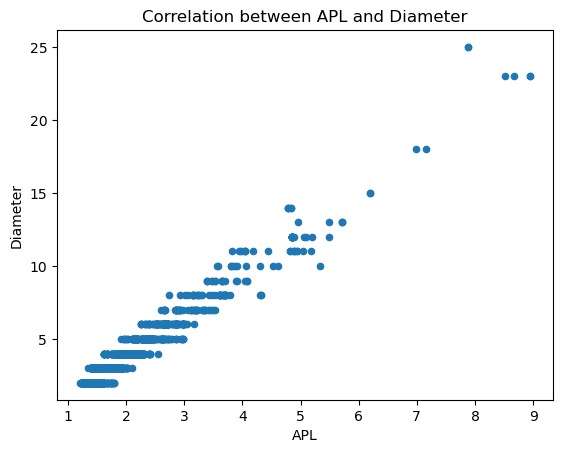

 
Correlation between nodes and edges at R=0.9543130493026657


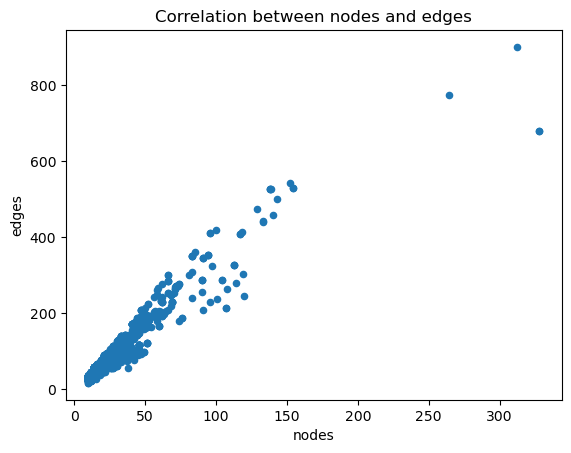

 
Correlation between Average Closeness and Density at R=0.9259502202496177


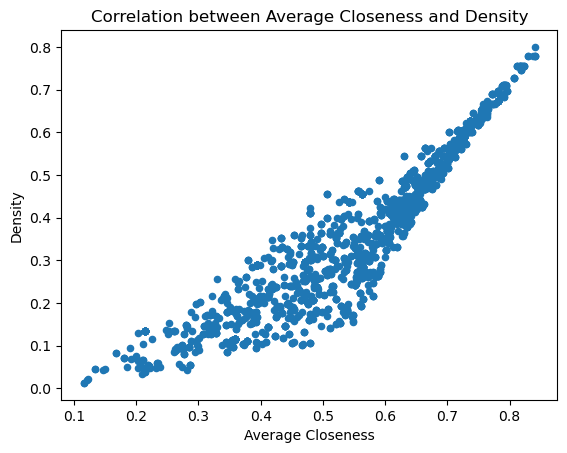

 
Correlation between APL and Average Closeness at R=0.883623480663261


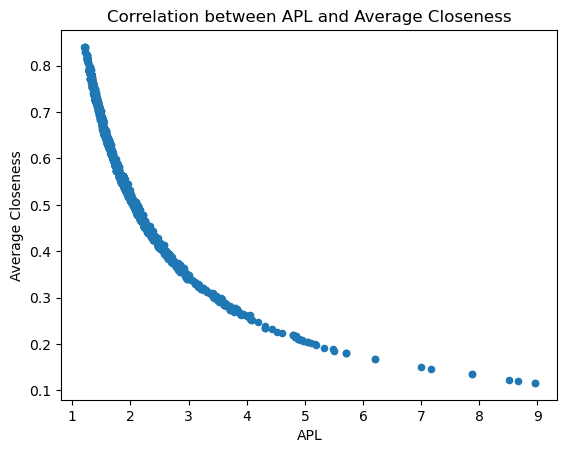

 
Correlation between Diameter and Average Closeness at R=0.8560303692380293


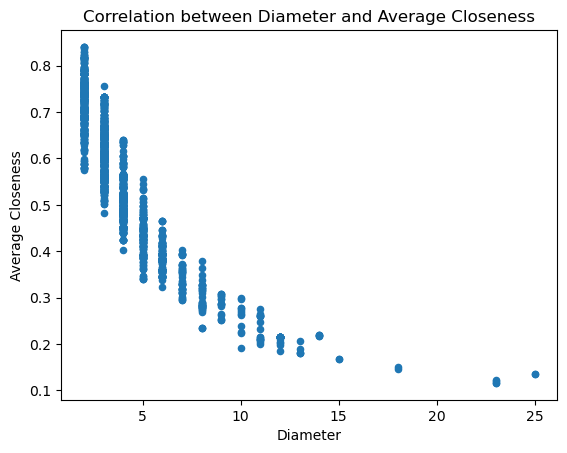

 
Correlation between nodes and APL at R=0.8087788804653951


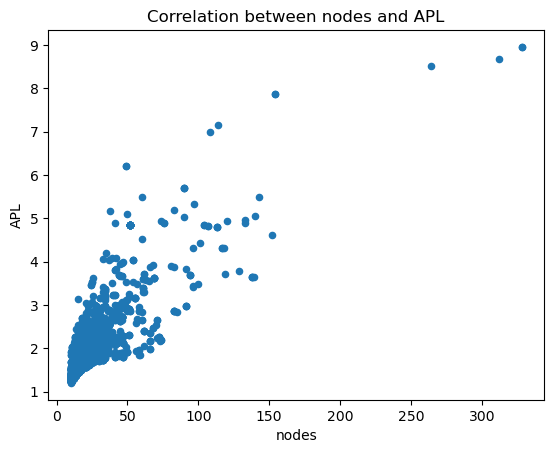

In [26]:
correlation_list = []
processed_pairs = set()
vars = list(corr_matrix.columns)

for feature1 in vars:
    for feature2 in vars:
        if feature1 != feature2 and (feature1, feature2) not in processed_pairs and (feature2, feature1) not in processed_pairs:
            correlation = abs(corr_matrix[feature1][feature2])
            correlation_list.append((feature1, feature2, correlation))
            processed_pairs.add((feature1, feature2))


sorted_correlation_list = sorted(correlation_list, key=lambda x: x[2], reverse=True)
threshold = 0.8
high_correlations = [corr for corr in sorted_correlation_list if corr[2] > threshold]

for feature1, feature2, correlation in high_correlations:
    print("Correlation between {0} and {1} at R={2}".format(feature1, feature2, correlation))
    
    ax = two_thousand_commuinities_stats.plot.scatter(feature1, feature2)
    plt.title("Correlation between {0} and {1}".format(feature1, feature2))
    plt.show()
    print(" ")

* Correlation between APL and Diameter at R=0.9748 is the highest correlation. This makes sense, as both metrics are used to measure distance between nodes in a graph, so, generally, communities with higher overall distances will also have larger APL’s.
* Correlation between nodes and edges at R=0.9543, as expected, given that generally communities with more nodes have more edges. 
* Correlation between Average Closeness and Density at R=0.9260. Communities with higher density have better connected nodes, which reduces the distances to other nodes, increasing the closeness centrality. 
* Correlation between APL and Average Closeness at R= -0.8836. Here we have a negative correlation, given that the longer a path length is, the further away the nodes are from each other generally, lowering the closeness centrality.
* Correlation between Diameter and Average Closeness at R= -0.8560. Another negative correlation, since communities with higher longest shortest path indicate that the nodes are generally far away from each other.
* Correlation between nodes and APL at R=0.8088, which can be explained by the challenge to keep up an efficient connectivity as the size of the network grows, increasing the average path length.

### Scatter Matrix

Every correlation

array([[<Axes: xlabel='nodes', ylabel='nodes'>,
        <Axes: xlabel='edges', ylabel='nodes'>,
        <Axes: xlabel='APL', ylabel='nodes'>,
        <Axes: xlabel='Diameter', ylabel='nodes'>,
        <Axes: xlabel='Assoratativity', ylabel='nodes'>,
        <Axes: xlabel='Average Clustering Coefficient', ylabel='nodes'>,
        <Axes: xlabel='Average Closeness', ylabel='nodes'>,
        <Axes: xlabel='Betweenness', ylabel='nodes'>,
        <Axes: xlabel='Density', ylabel='nodes'>],
       [<Axes: xlabel='nodes', ylabel='edges'>,
        <Axes: xlabel='edges', ylabel='edges'>,
        <Axes: xlabel='APL', ylabel='edges'>,
        <Axes: xlabel='Diameter', ylabel='edges'>,
        <Axes: xlabel='Assoratativity', ylabel='edges'>,
        <Axes: xlabel='Average Clustering Coefficient', ylabel='edges'>,
        <Axes: xlabel='Average Closeness', ylabel='edges'>,
        <Axes: xlabel='Betweenness', ylabel='edges'>,
        <Axes: xlabel='Density', ylabel='edges'>],
       [<Axes: xlabel='n

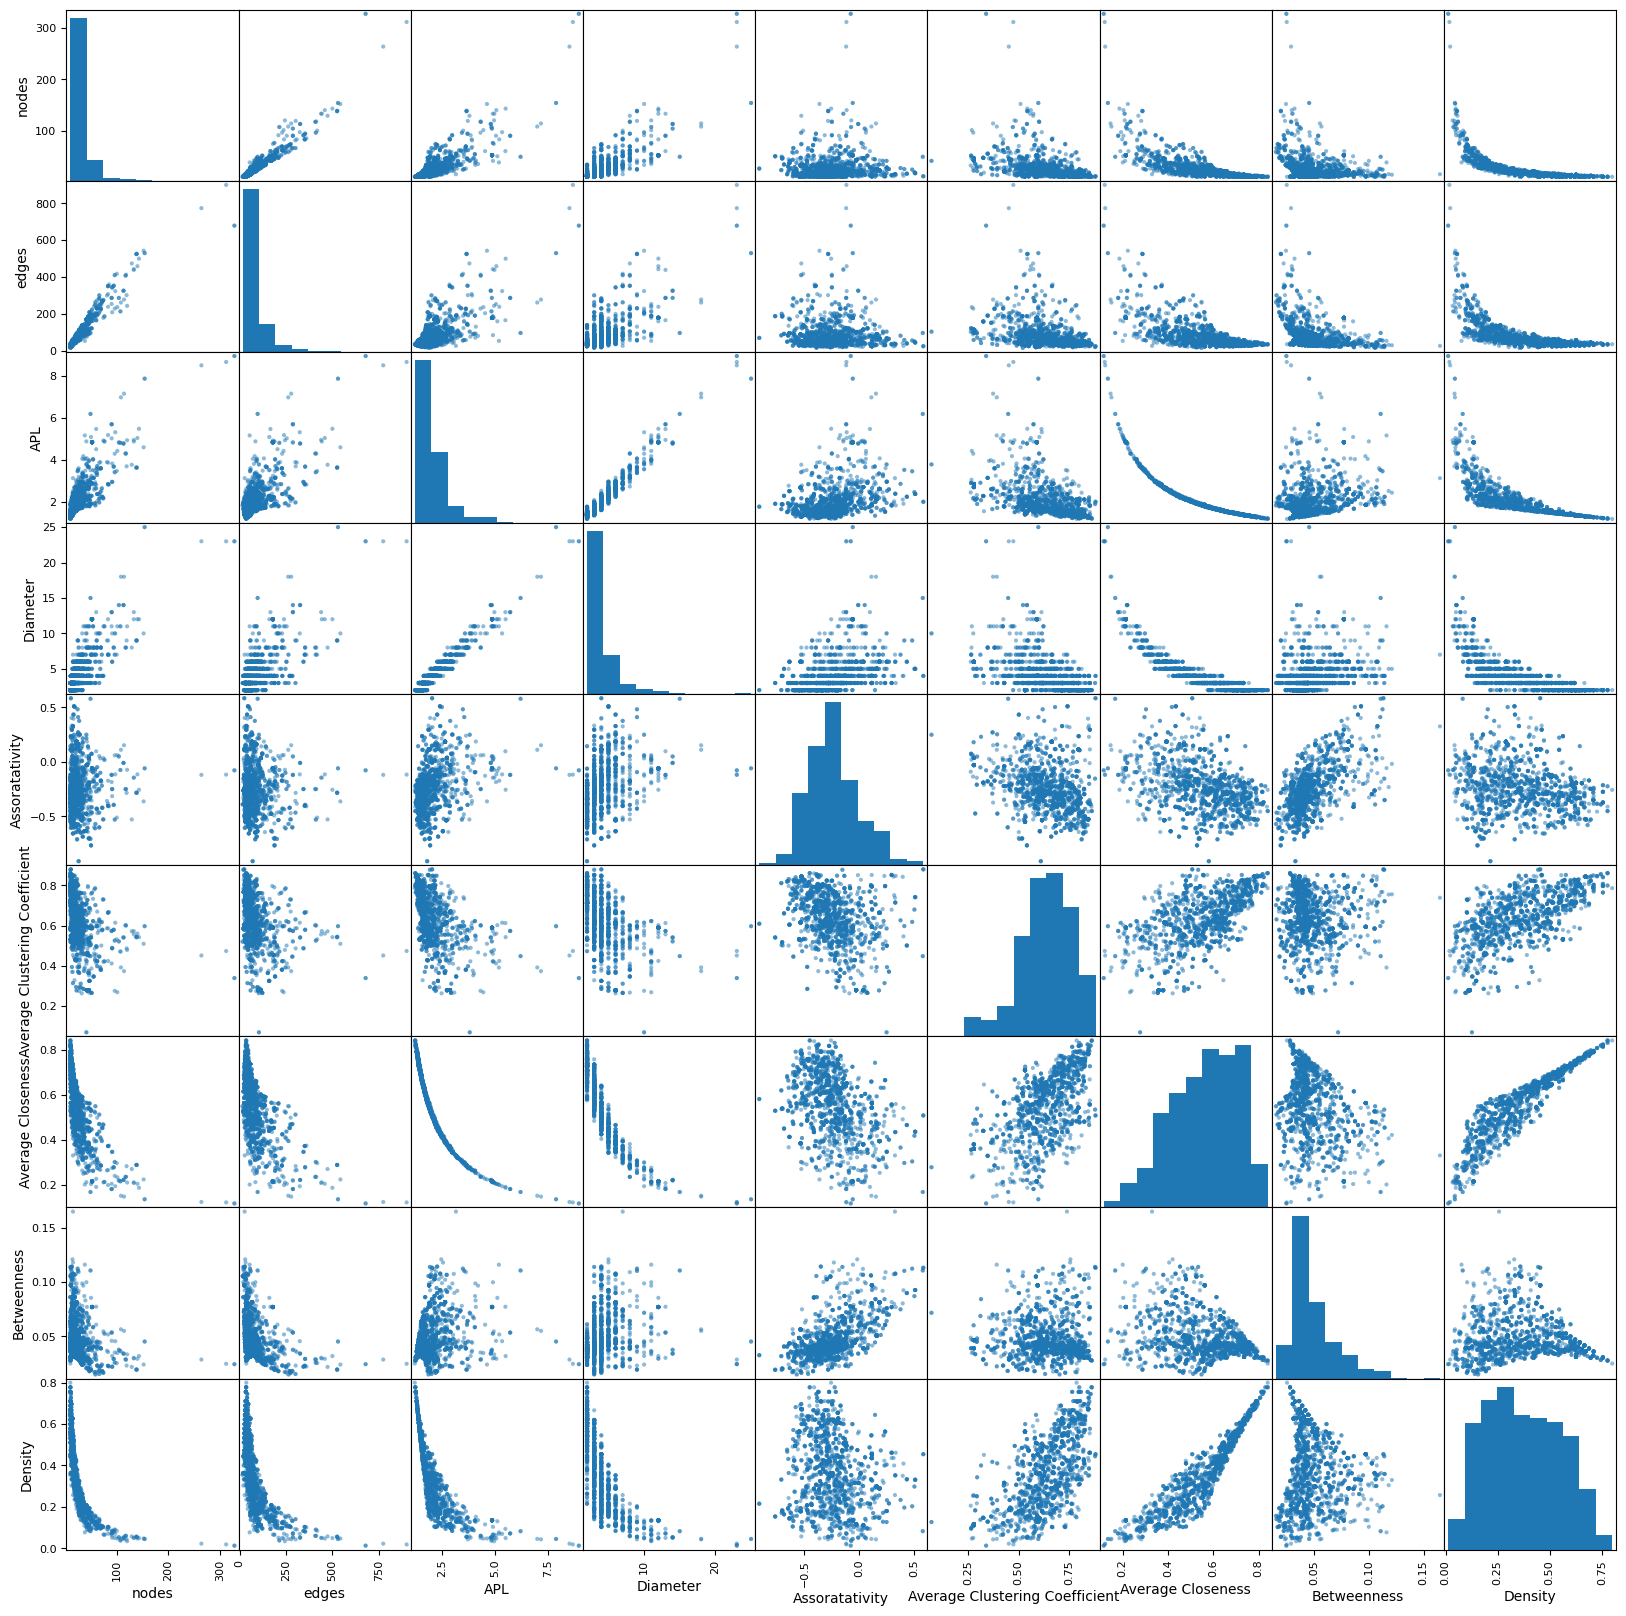

In [27]:
pd.plotting.scatter_matrix(two_thousand_commuinities_stats, figsize=(20,20))